In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Домашнее задание "Продвинутая линейная алгебра"

## Уровень 0:

Придумайте матрицы, которые обладают следующими свойствами:

a) Диагональная, ортогональная, но не единичная(!)

In [2]:
m = np.array([[-1,0,0],[0,-1,0],[0,0,-1]])
m

array([[-1,  0,  0],
       [ 0, -1,  0],
       [ 0,  0, -1]])

In [3]:
m@m.T

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

b) Верхнетреугольная, ортогональная

In [4]:
m = np.array([[1,0,0],[0,-1,0],[0,0,-1]])
m

array([[ 1,  0,  0],
       [ 0, -1,  0],
       [ 0,  0, -1]])

In [5]:
m@m.T

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

c) Нижнетреугольная, ортогональная

In [6]:
m = np.array([[1,0,0],[0,-1,0],[0,0,1]])
m

array([[ 1,  0,  0],
       [ 0, -1,  0],
       [ 0,  0,  1]])

In [7]:
m@m.T

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

d) Матрица, у которой определитель = 1, и все элементы не равны 0

In [8]:
m = np.array([[5,  0.9],
              [10, 2  ]])
np.linalg.det(m)

1.0

Найдите собственные значения и собственные вектора матриц:

In [9]:
m = np.array([[2, 2],
              [1, 3]])
print(m)

[[2 2]
 [1 3]]


In [10]:
w, v = np.linalg.eig(m)
for index in range(len(w)):
    print(f'Собственное число - {w[index]}, соответствующий собственный вектор - {v[index]}')

Собственное число - 1.0, соответствующий собственный вектор - [-0.89442719 -0.70710678]
Собственное число - 4.0, соответствующий собственный вектор - [ 0.4472136  -0.70710678]


## Уровень 1:
Найдите спектральное разложение матрицы:

In [11]:
m = np.array([[1, 2],
              [2,3]])
print(m)

[[1 2]
 [2 3]]


In [12]:
w, v = np.linalg.eig(m)
matrix_D = np.diag(w)

In [13]:
# По формуле спектрального разложения найдем исходную матрицу, должна совпасть с заданной
v @ matrix_D @ v.T

array([[1., 2.],
       [2., 3.]])

Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.

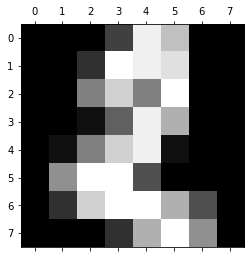

In [14]:
X, y = load_digits(return_X_y=True)
digit = X[2]
digit = digit.reshape((8, 8))
plt.matshow(digit, cmap = 'gray')
plt.show()

Качество модели будем оценивать следующими способами:

- Чем больше исходных данных, которые могут описать наши главные компоненты, тем модель лучше. 

В данном случае собственные числа в матричном разложении - максимальный размер дисперсии на определенном пространственном уровне. За 100% берем сумму всех максимальных дисперсий в каждом измерении исходных данных. При выборе количества главных компонент меньше уровня изначальных измерений, мы отбрасываем уровни с наименьшей дисперисей. В результате наши главные компоненты будут описывать модель уже не на 100%, а меньше. Считается оптимальным выбором, если главные компоненты содержат в себе 95-99% всей дисперсии из исходных данных.

- Оптимальная модель не должна включать в себя собственные значения (дисперсии) меньше 1. Условие не жесткое, зависит от ситуации.

- Невысокий уровень MSE

In [15]:
mse_stat = []
orig_inf_percent_stat = []
for number_factors in range(1, 9):
    pca = PCA(n_components=number_factors)
    pca_digit = pca.fit_transform(digit)
    pca_digit_recover = pca.inverse_transform(pca_digit)
    mse = round(mean_squared_error(pca_digit_recover, digit), 2)
    
    # Общий процент исходной информации, которые могут описать наши главные компоненты
    orig_inf_percent = round(sum(pca.explained_variance_ratio_)*100, 2)
    # Минимальное значение дисперсии главных компонент
    minimal_var = round(pca.explained_variance_[-1], 2)
    
    mse_stat.append((number_factors, mse))
    orig_inf_percent_stat.append((number_factors, orig_inf_percent))
    
    print(f'Количество факторов: {number_factors}')
    print(f'MSE {mse}')
    print(f'Процент исходной информации в главных компонентах: {orig_inf_percent}%')
    print(f'Дисперсия наименьшего главного компонента: {minimal_var}')
    print(f'===============================================')
    
mse_stat = np.array(mse_stat)
orig_inf_percent_stat = np.array(orig_inf_percent_stat)

Количество факторов: 1
MSE 6.1
Процент исходной информации в главных компонентах: 61.96%
Дисперсия наименьшего главного компонента: 90.82
Количество факторов: 2
MSE 3.53
Процент исходной информации в главных компонентах: 77.97%
Дисперсия наименьшего главного компонента: 23.47
Количество факторов: 3
MSE 1.53
Процент исходной информации в главных компонентах: 90.44%
Дисперсия наименьшего главного компонента: 18.28
Количество факторов: 4
MSE 0.4
Процент исходной информации в главных компонентах: 97.52%
Дисперсия наименьшего главного компонента: 10.38
Количество факторов: 5
MSE 0.15
Процент исходной информации в главных компонентах: 99.07%
Дисперсия наименьшего главного компонента: 2.27
Количество факторов: 6
MSE 0.0
Процент исходной информации в главных компонентах: 100.0%
Дисперсия наименьшего главного компонента: 1.36
Количество факторов: 7
MSE 0.0
Процент исходной информации в главных компонентах: 100.0%
Дисперсия наименьшего главного компонента: 0.0
Количество факторов: 8
MSE 0.0
Проц

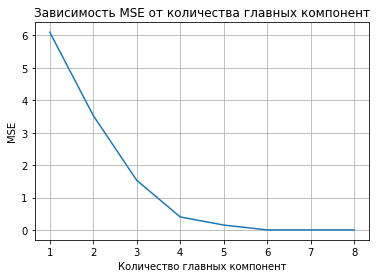

In [16]:
plt.plot(mse_stat[:,0], mse_stat[:,1])
plt.xlabel("Количество главных компонент")
plt.ylabel("MSE")
plt.title('Зависимость MSE от количества главных компонент')
plt.grid()
plt.show()

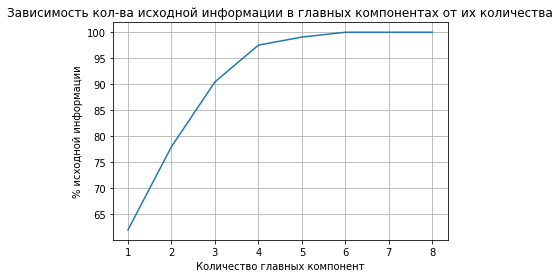

In [17]:
plt.plot(orig_inf_percent_stat[:,0], orig_inf_percent_stat[:,1])
plt.xlabel("Количество главных компонент")
plt.ylabel("% исходной информации")
plt.title('Зависимость кол-ва исходной информации в главных компонентах от их количества')
plt.grid()
plt.show()

Из полученных результатов можно сделать вывод:
- для 100% восстановления изображения нам необходимо не более 6 главных компонент, 2 из 8 измерения имеют нулевую дисперсию и вообще не важны для восстановления данных, также MSE = 0
- оптимальное количество главных компонент - 4, четыре компоненты могут описать исходные данные с точностью 97%. MSE < 1.
- один фактор может описать исходные данные на 61%, что не является достаточным.